In [21]:
import os
%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm

from src.deep.ml_ops import Trainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# load trainer from file
trainer = Trainer.load_trainer_from_file('../../data/saved_models/model_SingleMuModel3Layers_300_epochs_mu_0.008')

In [23]:
# TODO: create function Trainer.fix_datasets_paths(dataset_path)
trainer.fix_datasets_paths(dataset_path='../../data/datasets')

updating path to:
	/Users/yarden/Desktop/projects/thesis_stuff/Thesis-code/data/datasets/qam1024_160x20/160_samples_mu=0.008
updating path to:
	/Users/yarden/Desktop/projects/thesis_stuff/Thesis-code/data/datasets/qam1024_160x20/160_samples_mu=0.008


x.shape=torch.Size([8192, 2]), y.shape=torch.Size([8192, 2])
x_np.shape=(8192, 2),y_np.shape=(8192, 2),pred_np.shape=(8192, 2)


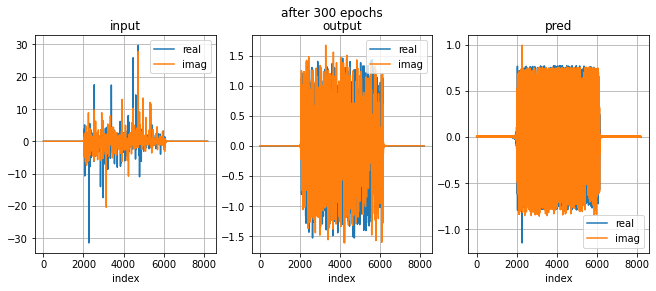

x power=0.8550901412963867
y power=0.23215052485466003
pred power=0.12


In [24]:
trainer.test_single_item(0, verbose=True)

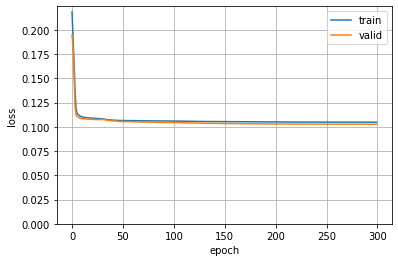

In [25]:
trainer.plot_loss_vec()

In [26]:
# calc original ber
trainer.compare_ber(tqdm=tqdm)

  0%|          | 0/32 [00:00<?, ?it/s]

the original avg ber is 0.310186767578125


  0%|          | 0/32 [00:00<?, ?it/s]

the trained avg ber is 0.198016357421875
